In [1]:
import gpustat
gpustat.print_gpustat()
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'
import random
random.seed(0)
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten, Concatenate, Lambda
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import backend as K
import seaborn as sns
sns.set(style="white", color_codes=True)

gpu-4-culture-plate-sm  Fri Jul 26 16:58:03 2019
[0] GeForce GTX 1080 | 26'C,   0 % |     0 /  8114 MB |
[1] GeForce GTX 1080 | 51'C,   0 % |  5333 /  8114 MB | thong(5323M)
[2] GeForce GTX 1080 | 35'C,   0 % |     0 /  8114 MB |
[3] GeForce GTX 1080 | 25'C,   0 % |  8111 /  8114 MB | thong(8101M)
[4] GeForce GTX 1080 | 59'C,  57 % |  1427 /  8114 MB | azlokapa(1417M)
[5] GeForce GTX 1080 | 67'C,  61 % |  1501 /  8114 MB | azlokapa(1491M)
[6] GeForce GTX 1080 | 28'C,   0 % |  3817 /  8114 MB | thong(3807M)
[7] GeForce GTX 1080 | 27'C,   0 % |     0 /  8114 MB |


Using TensorFlow backend.


/nfshome/thong/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/nfshome/thong/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Number of data points:  20000


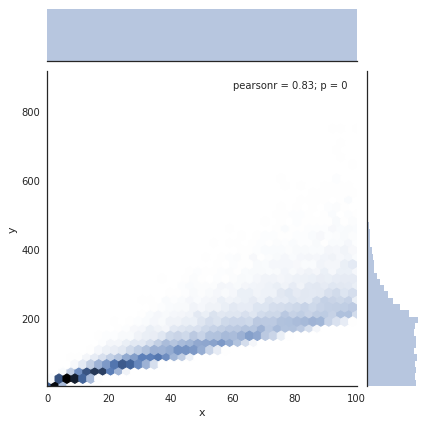

In [2]:
x = np.arange(100, step=0.005)
y = 3+2*x + np.random.exponential(x)
yval = 3+2*x + np.random.exponential(x)
data = pd.DataFrame({'x':x, 'y':y, 'yval': yval})
sns.jointplot(x="x", y="y", data=data, kind='hex')

# Shuffle the dataset for training
idx = np.arange(len(x))
np.random.shuffle(idx)
x_train = x[idx]
y_train = y[idx]
y_trainval = yval[idx]
print("Number of data points: ", len(x))

In [7]:
inputs = Input(shape=(1,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1)(hidden)
model = Model(inputs, output)
model.compile(loss='mse', optimizer='adam')
model.summary()

model.fit(x_train,y_train,  epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_data=(x,yval))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 20000 samples
Epoch 1/100
20000/20000 [==============================] - 2s 89us/step - loss: 4067.9692 - val_loss: 3405.6014
Epoch 2/100
20000/20000 [==============================] - 1s 44us/step - loss: 3234.3073 - val_loss: 

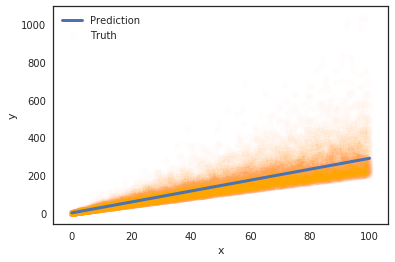

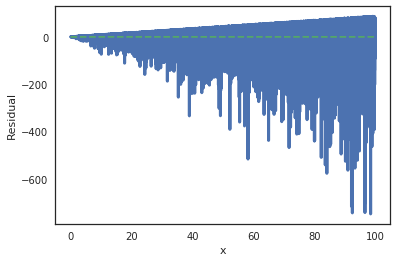

In [9]:
yhat = model.predict(x)
plt.plot(x,yhat, linewidth=3, label='Prediction')
plt.scatter(x,yval, color='orange', label='Truth', alpha=0.01)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure()
res_y = yhat.flatten()-yval
plt.plot(x, res_y, linewidth=3)
plt.plot(x,0*x, '--')
plt.xlabel('x')
plt.ylabel('Residual')
plt.show()


In [10]:
inputs = Input(shape=(1,))
hidden = Dense(1000, activation='relu')(inputs)
hidden = Dense(1000, activation='relu')(hidden)
output = Dense(1)(hidden)
model_mae = Model(inputs, output)
model_mae.compile(loss='mae', optimizer='adam')
model_mae.summary()

model_mae.fit(x_train,y_train,  epochs=100, batch_size=100, verbose=1, 
          callbacks=[EarlyStopping(monitor='val_loss', patience=5)],
          validation_data=(x,yval))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 1,004,001
Trainable params: 1,004,001
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 20000 samples
Epoch 1/100
20000/20000 [==============================] - 1s 50us/step - loss: 37.9071 - val_loss: 35.0017
Epoch 2/100
20000/20000 [==============================] - 1s 43us/step - loss: 34.6009 - val_loss: 35.285

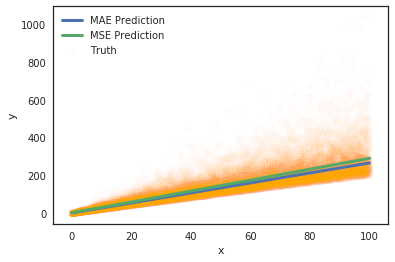

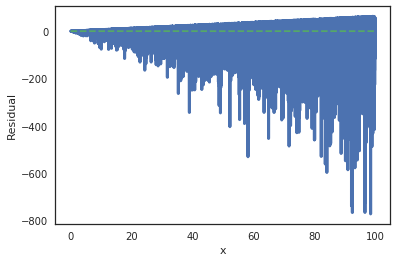

In [12]:
yhat_mae = model_mae.predict(x)
yhat_mse = model.predict(x)
plt.plot(x,yhat_mae, linewidth=3, label='MAE Prediction')
plt.plot(x,yhat_mse, linewidth=3, label='MSE Prediction')
plt.scatter(x,yval, color='orange', label='Truth', alpha=0.01)
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure()
res_y = yhat.flatten()-yval
plt.plot(x, res_y, linewidth=3)
plt.plot(x,0*x, '--')
plt.xlabel('x')
plt.ylabel('Residual')
plt.show()


In [4]:
def sum_of_gaussians(x, mu_vec, sigma_vec):
    # x: numpy array of the bin centers
    x = np.atleast_2d(x)
    if x.shape[0] <= x.shape[1]:
        x = x.T
    x_norm = (x - mu_vec)/sigma_vec
    single_gaus_val = np.exp(-0.5*np.square(x_norm))/(sigma_vec*np.sqrt(2*np.pi))
    return np.sum(single_gaus_val, axis=1)/mu_vec.shape[0]

Epoch 0: Loss: 55.02720260620117.
Epoch 1: Loss: 43.49789810180664.
Epoch 2: Loss: 47.11275863647461.
Epoch 3: Loss: 53.47513198852539.
Epoch 4: Loss: 54.611488342285156.
Epoch 5: Loss: 40.52397537231445.
Epoch 6: Loss: 48.171112060546875.
Epoch 7: Loss: 42.13474655151367.
Epoch 8: Loss: 53.537132263183594.
Epoch 9: Loss: 53.56039810180664.


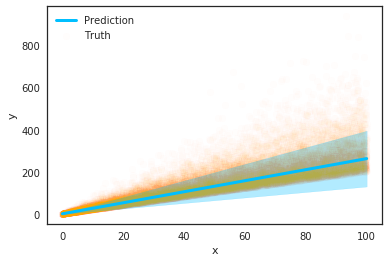

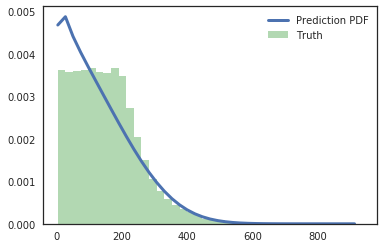

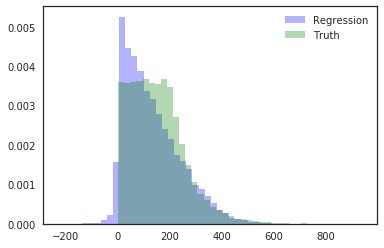

In [5]:
import torch
import torch.nn as nn
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim as optim
import torch.utils.data.distributed
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

def custom_loss(y_true, y_pred):
    y_mean = y_pred[:,0].unsqueeze(1)
    y_upperbound = y_pred[:,1].unsqueeze(1)
    loss_mean = torch.abs(y_true - y_mean)
    alpha = 0.841
    err = y_true - y_upperbound
    loss_ub = (err >= 0).float()*alpha*err + (err < 0).float()*(alpha-1)*err
    return torch.mean(torch.mean((loss_mean + loss_ub), -1), -1)
    
model = torch.nn.Sequential(
    torch.nn.Linear(1, 1000),
    torch.nn.ReLU(),
    torch.nn.Linear(1000, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, 2)
).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1.e-3)

class MyDataset(Dataset):
    def __init__(self, xdata, ydata):
        self.xdata = torch.from_numpy(xdata).float()
        self.ydata = torch.from_numpy(ydata).float()

    def __len__(self):
        return len(self.xdata)

    def __getitem__(self, idx):
        return self.xdata[idx], self.ydata[idx]
    
train_data = MyDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)

for t in range(10):
    batch_loss =  []
    for xtrain, ytrain in train_loader:
        
        y_pred = model(Variable(xtrain.unsqueeze(1).float().cuda()))
        label = Variable(ytrain.float()).cuda()
        
        # Compute and print loss.
        loss = custom_loss(label.unsqueeze(1), y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  
    print("Epoch {}: Loss: {}.".format(t, loss.data[0]))

model = model.cpu()
pred = model(Variable(torch.from_numpy(x).unsqueeze(1).float(), True))
yhat = pred[:,0].data.cpu().numpy()
upper_bound = pred[:,1].data.cpu().numpy()

plt.scatter(x, yval, color='orange', label='Truth', alpha=0.01)
plt.plot(x, yhat, linewidth=3, color='deepskyblue', label='Prediction')
plt.fill_between(x, 2*yhat-upper_bound, upper_bound, alpha=0.3, color='deepskyblue')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')
plt.show()

N_bins = 40

l_bound = min(yval)
u_bound = max(yval)
bin_width = (u_bound - l_bound)/N_bins
z = np.arange(l_bound, u_bound, bin_width)
std_pred = upper_bound-yhat
bin_content = sum_of_gaussians(z, yhat, std_pred)
plt.figure()
plt.plot(z,bin_content, linewidth=3, label='Prediction PDF')
plt.hist(yval, color='green', bins=N_bins, alpha=0.3, label='Truth', density=True)
plt.legend(loc='best')
plt.show()

# Sample from predict PDF to get a new dataset
yregressed = yhat + np.random.normal(0, np.absolute(std_pred))
plt.figure()
plt.hist(yregressed, color='blue', bins=N_bins, alpha=0.3, label='Regression', density=True)
plt.hist(yval, color='green', bins=N_bins, alpha=0.3, label='Truth', density=True)
plt.legend(loc='best')
plt.show()


Impossible to get it right without using the right model for the noise.